# 1. Questão
**Desenvolva os cálculos necessários para obtenção dos estimadores de mínimos quadrados em um modelo de regressão linear simples com intercepto, mostrando que são válidas as expressões:**

* $\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{x}$
* $\hat{\beta_1} = \frac{\sum x_iY_i - \sum \frac{Y_i}{n}}{\sum x_i^2 - \sum \frac {(x_i)^2}{n}} = \frac {S_{xy}}{S_{xx}}$



**Resposta**

* Para $\hat{\beta_0}$ temos:

Montando a Equação:
$$\large \frac{\partial RSS}{\partial \beta_0}|_{\hat{\beta_0},\hat{\beta_1}} = \large \frac{\partial}{\partial \beta_0}  \sum_{i=1}^n(y_i - \hat{\beta_0}-\hat{\beta_1}x_i)^2 = 0$$

Elevando ao quadrado:
$$\large \frac{\partial}{\partial \beta_0} \sum_{i=1}^n({y_i^2} - {y_i\hat{\beta_0}}-{y_i\hat{\beta_1}x_i}+{\hat{\beta_0}y_i}+\hat{\beta_0}^2+ {\hat{\beta_0}\hat{\beta_1}x_i}-{\hat{\beta_1}x_iy_i}+{\hat{\beta_1}x_i\hat{\beta_0}}+{\hat{\beta_1}^2x_i^2})$$

Somando elementos iguais:
$$\large \frac{\partial}{\partial \beta_0} \sum_{i=1}^n({y_i^2} -{2}y_i\hat{\beta_0}-{2y_i\hat{\beta_1}x_i}+\hat{\beta_0}^2+ {2}\hat{\beta_0}\hat{\beta_1}x_i+{\hat{\beta_1}^2x_i^2})$$

Fazendo a derivada parcial em relação à $\hat{\beta_0}$:
$$\large \sum_{i=1}^n( -2y_i+2\hat{\beta_0}+ 2\hat{\beta_1}x_i) = 0$$

Atribuindo o somatório a cada parcela:
$$\large \sum_{i=1}^n-2y_i+\sum_{i=1}^n2\hat{\beta_0}+ \sum_{i=1}^n2\hat{\beta_1}x_i = 0$$

Colocando o $2$ em evidência:
$$\large 2(\sum_{i=1}^n-y_i+\sum_{i=1}^n\hat{\beta_0}+ \sum_{i=1}^n\hat{\beta_1}x_i )= 0$$

Organizando a equação:
$$\large \sum_{i=1}^n-y_i+n\hat{\beta_0}+ n\hat{\beta_1}\sum_{i=1}^nx_i= 0$$

$$\large n\hat{\beta_0} + n\hat{\beta_1}\sum_{i=1}^nx_i= \sum_{i=1}^ny_i$$

$$\large \hat{\beta_0} + \hat{\beta_1}\bar{x}= \bar{y}$$

$$\Large \hat{\beta_0}= \bar{y} - \hat{\beta_1}\bar{x}$$

# 2 Questão:
**Use os dados de investimento em propaganda de TV (x) e vendas (y), disponíveis no arquivo "‘Advertising.csv", que
podem ser baixados em link no mural da turma, no Google Classroom. Com base nesses dados:**

In [ ]:
# Importando biblioteca:
library(googledrive) # Necessário para acessar o drive:
drive_auth() # Acessando o drive:

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: amorimandre2012@gmail.com


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=9af98c041c851ff742900d364b471f56&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIQzdOTmRUY3Vaa2NVSTV6S25RaGxodURqaVJqWDRfUmdkZWhrVFlRcmQ1N2tZbHJGbEhaZXBzTG5ZaXhSeTJlQSIsInN0YXRlIjoiOWFmOThjMDQxYzg1MWZmNzQyOTAwZDM2NGI0NzFmNTYifQ==


## Aquisitando dados

    Como estou usando o google colab, para evitar encher a minha
    máquina com arquivos, eu fiz uma cópia do arquivo no google
    classroom no meu google drive e aqui eu baixo o arquivo do google
    drive para a área de arquivos do Colab.

    É possivel, através do Tydiverse do R, se conectar diretamente com
    o seu drive, assim como utilizando o python.

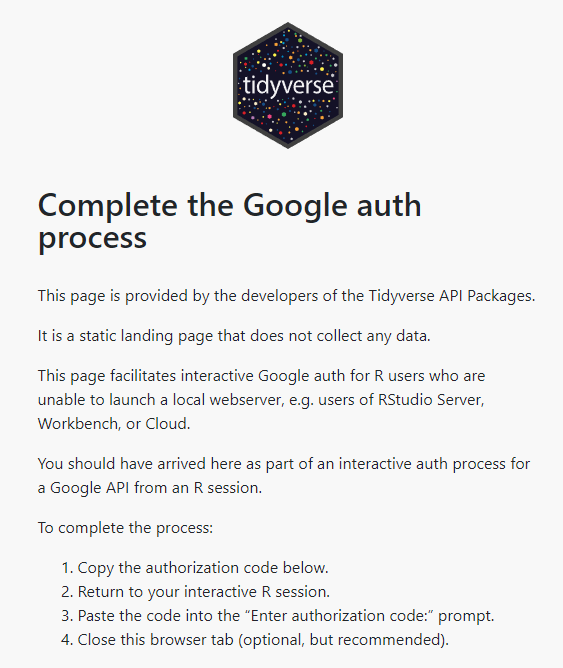    

Documentação: https://googledrive.tidyverse.org/

In [ ]:
# Encontrando o arquivo CSV no Google Drive
arquivo <- drive_find(type = "csv", pattern = "Advertising") # Se tiver 2 arquivos com o mesmo nome, dá erro!

In [ ]:
# Baixando o arquivo para o ambiente de trabalho
drive_download(arquivo$id)

File downloaded:

• Advertising.csv <id: 1YmWnvaFgEl5sA35ectaLZj68P7anPl8O>

Saved locally as:

• Advertising.csv



In [ ]:
# Gerando o DataFrame:
df <- read.csv(arquivo$name);head(df)

,X,TV,radio,newspaper,sales
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2


    Essa coluna X parece que está errada, esqueceram de exportar
    o dataframe sem a coluna index, então vou excluir porque não
    parece que faz parte do cojunto de dados;

In [ ]:
# Dropando coluna:
df <- subset(df, select = -X);head(df)

,TV,radio,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2


## (a) Faça os cálculos para a obtenção das estimativas de mínimos quadrados para β0 e β1.

    Sabemos que, para uma regressão linear normal simples, temos:

* $\hat{\beta_0} = \bar{Y} - \hat{\beta_1}\bar{x}$
* $\hat{\beta_1} = \frac{\sum x_iY_i - \sum \frac{Y_i}{n}}{\sum x_i^2 - \sum \frac {(x_i)^2}{n}} = \frac {S_{xy}}{S_{xx}}$

    Deste modo:

**Funções utilizadas**

In [ ]:
fit <- function(x,y){
  #----------------------------------------
  # Função criada para gerar calcular
  # coeficientes coeficientes da regressão.
  #
  # Entradas:
  # Vetor - Variável Preditora;
  # Vetor - Variável Dependente.
  #
  # Saída:
  # Vetor - Interceptor e Coeficiente Angular.
  #----------------------------------------

  # Gerando médias:
  xbarra <- mean(x)
  ybarra <- mean(y)

  # Calculo dos coeficientes:
  ## Coeficiente Angular:
  b1 <- sum((x-xbarra)*(y-ybarra))/sum((x-xbarra)^2)

  ## Interceptor:
  b0 <- ybarra - b1*xbarra

  return(c(b0,b1))

}

In [ ]:
reg <- function(coef, x){
  #------------------------------
  # Função criada para, dado os coeficientes
  # calcular o nosso valor esperado para cada
  # tupla de (preditora, dependente).
  #
  # Entrada:
  # Vetor - Coeficientes;
  # Vetor - Variável Preditora.
  #
  # Saída:
  # Vetor - Predição.
  #------------------------------
  ypred = coef[1] + coef[2]*x
  return(ypred)
}

In [ ]:
visualization <- function(x, y, predict = NULL, coeficientes = NULL, posicao_legenda, xlabel, ylabel) {
  #------------------------------------------------------------
  # Função criada para gerar as visualizações dos conjuntos de
  # dados, com e sem a reta de regressão.
  #
  # Entrada:
  # Vetores - Variável preditora, Variável dependente;
  # Vetores opcionais - valores esperados, coeficientes;
  # string - legendas;
  #
  # Saída:
  # Visualização - Informação gráfica.
  #------------------------------------------------------------


  # Visualizando os dados
  plot(x, y, col = 'blue', xlab = xlabel, ylab = ylabel,
       main = 'Dados para Regressão Linear Simples', pch = 19)
  grid()  # Ativar a grade

  # Checando se foi informado as informações da reta de regressão:
  if (!is.null(predict) && !is.null(coeficientes)) {
    # Adicionando a reta de regressão
    lines(x, predict, col = 'red')
    # Adicionando ponto para o intercepto
    points(0, coeficientes[1], col = 'green', pch = 19)
    # Adicionando legenda do gráfico
    legend(posicao_legenda, legend=c("Dados Observados", "Reta de Regressão", "Intercepto"),
           col=c("blue", "red", "green"), pch=c(19, NA, 19), lty=c(0, 1, 0), xpd=TRUE)

    resp <- sprintf("Coeficientes Encontrados: b0 = %.2f e b1 = %.2f", coeficientes[1], coeficientes[2])
    print(resp)
  }
}


**Ajustando nosso modelo:**

In [ ]:
# Ajustando os coeficientes:
coefs <- fit(df$TV,df$sales)
# Calculando a reta de regressão:
y_pred <- reg(coefs,df$TV)

In [ ]:
# Checando valores:
cat("Obtemos então coeficientes:\n")
cat("Interceptor: ", sprintf("%.2f", coefs[1]), "\n")
cat("Coeficiente Angular: ", sprintf("%.2f", coefs[2]), "\n")

Obtemos então coeficientes:
Interceptor:  7.03 
Coeficiente Angular:  0.05 


## (b) Construa, no R, os seguintes diagramas de dispersão:

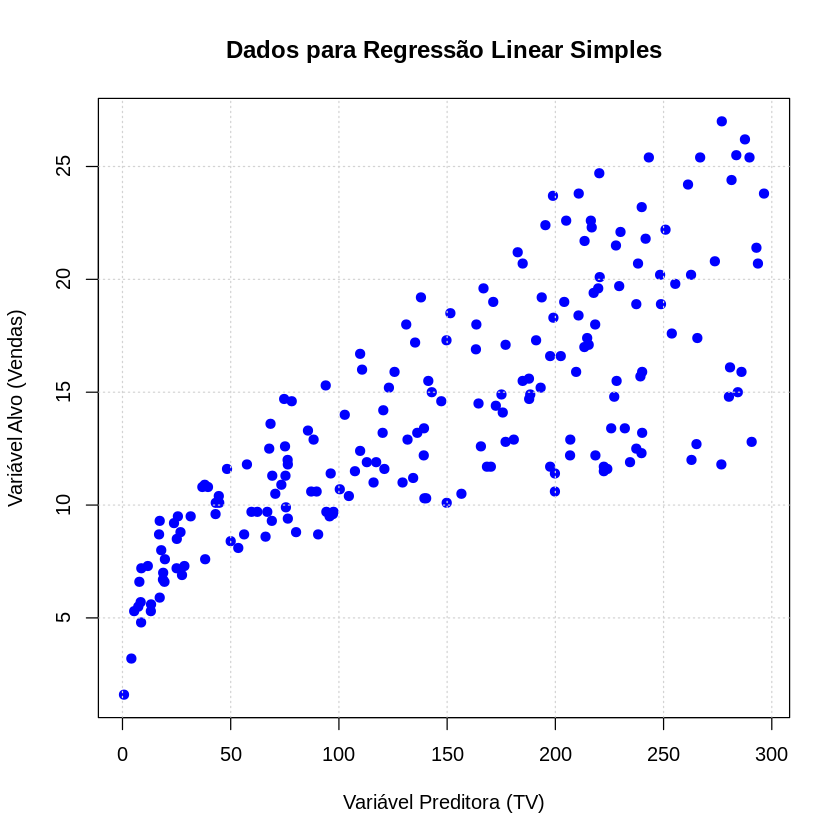

In [ ]:
# investimentos xi contra vendas observadas yi:
visualization(df$TV,df$sales,xlabel="Variável Preditora (TV)",ylabel="Variável Alvo (Vendas)")

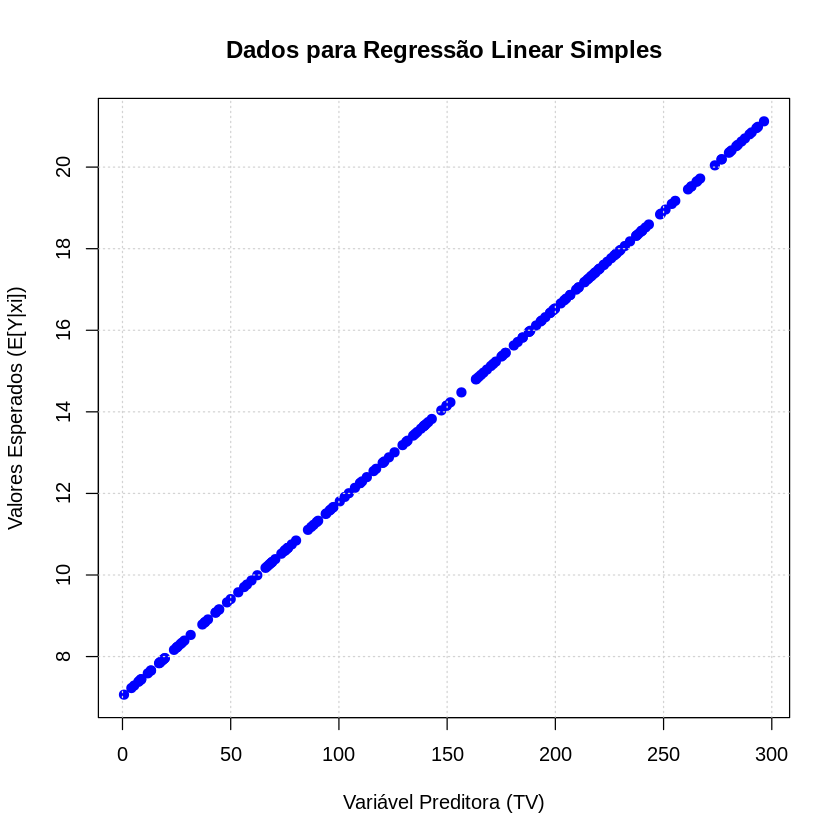

In [ ]:
# investimentos xi contra vendas ajustadas yˆi:
visualization(df$TV,y_pred,xlabel="Variável Preditora (TV)",ylabel="Valores Esperados (E[Y|xi])")

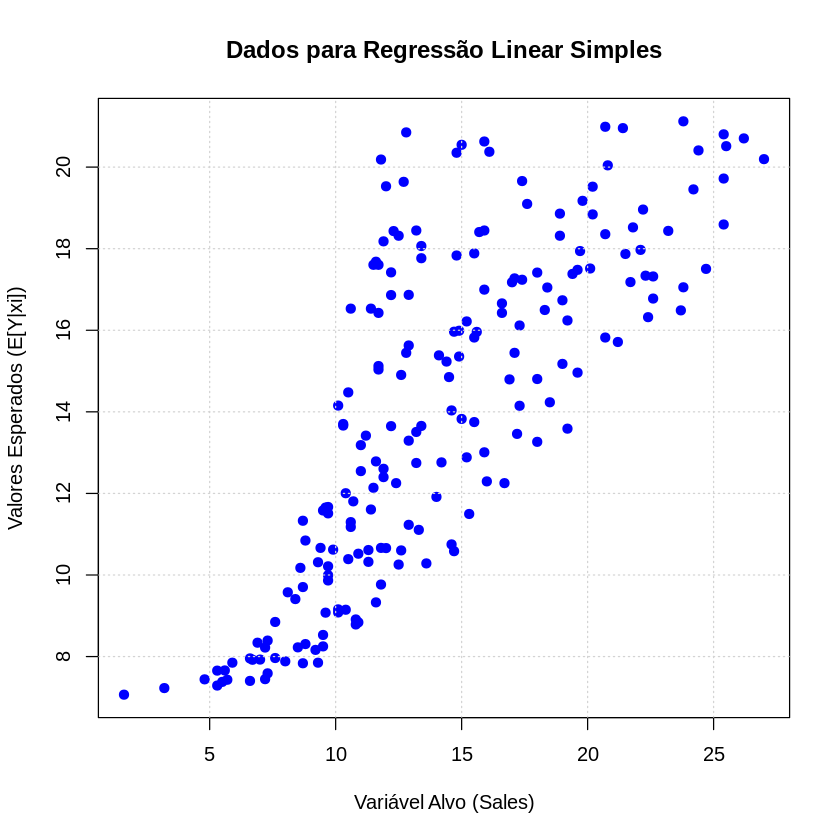

In [ ]:
# vendas observadas yi contra vendas ajustadas yˆi:
visualization(df$sales,y_pred,xlabel="Variável Alvo (Sales)",ylabel="Valores Esperados (E[Y|xi])")

**Conclusão**

    Vemos que o nosso conjunto de dados poussi uma heterocedasticidade, a
    variância não é constante, a medida que o valor de investimento aumenta,
    a variância dos dados aumenta também, o que indica que o nosso modelo
    perde a capacidade preditiva para grandes investimentos.

    Vemos também uma curva nos dados iniciais que indicam uma não-linearidade
    nos dados. Essa não-linearidade não se mantém, mas está lá.

# Questão 3:

**Existem situações em que não faz sentido pensar em desfecho (resposta) não nulo, quando a regressora (variável
exlicativa/ entrada) assume valor nulo. Nesses casos, é razoável pensar em um modelo sem intercepto:**

$$Y_i = \beta x_i+\epsilon_i, \ i=1,...,n.$$
$$\epsilon_i^{\prime}s \stackrel{\text{iid}}{\sim} N(0,\sigma^2)$$



## (a) Obtenha a expressão para o estimador de mínimos quadrados para β, com base na especificação acima.

**Resposta**

Montando a Equação:
$$\large \frac{d RSS}{d \beta}|_{\hat{\beta}} = \large \frac{d}{d \beta}  \sum_{i=1}^n(y_i -\hat{\beta}x_i)^2 = 0$$

Elevando ao Quadrado:
$$\large \frac{d}{d \beta}  \sum_{i=1}^n(y_i^2 -2y_i\hat{\beta}x_i+\hat{\beta}^2x_i^2) = 0$$

Derivando:
$$\large \sum_{i=1}^n(-2y_ix_i+2\hat{\beta}x_i^2) = 0$$

Ajeitando a equação:
$$\large 2(\sum_{i=1}^n-y_ix_i+\sum_{i=1}^n\hat{\beta}x_i^2) = 0$$

$$\large \sum_{i=1}^n\hat{\beta}x_i^2 = \sum_{i=1}^ny_ix_i$$


$$\large n\hat{\beta}\sum_{i=1}^nx_i^2 = \sum_{i=1}^ny_ix_i$$

$$\large \hat{\beta} = \frac {\sum_{i=1}^ny_ix_i}{n\sum_{i=1}^nx_i^2}$$

## (b) Exemplifique uma situação prática em que não faria sentido ter intercepto nulo em um modelo de regressão linear.

**Resposta**


# Questão 4:

Considere o modelo de regressão linear simples escrita na forma alternativa onde o regressor $x_i$ é substituído por

$$x_i^* = x_i - \bar{x}\ : \ y_i = \beta_0+\beta_1x_i^*+\epsilon_i$$